In [2]:
from google.colab import files
uploaded = files.upload()


Saving Unified_Monthly_EDA_Dataset.csv to Unified_Monthly_EDA_Dataset.csv


In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv")

# Select relevant variables for analysis
columns_of_interest = ['Total_Admissions', 'Flu_Admission_Rate', 'Mean_Temp_C', 'Rainfall_mm']

# Drop rows with missing values in selected columns
df_clean = df[columns_of_interest].dropna()

# Generate descriptive statistics
summary_stats = df_clean.describe().loc[["mean", "50%", "std", "min", "max"]]
summary_stats.rename(index={'50%': 'median'}, inplace=True)

# Transpose and format the table
summary_table = summary_stats.T.round(2)
summary_table.reset_index(inplace=True)
summary_table.columns = ['Variable', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']

# Display the table
print(summary_table.to_string(index=False))


          Variable       Mean     Median   Std Dev      Min       Max
  Total_Admissions 1323567.92 1329381.50 132736.03 656688.0 1630459.0
Flu_Admission_Rate    2568.00     278.00   7210.46      0.0   63099.0
       Mean_Temp_C       9.16       8.70      4.33     -0.9      17.2
       Rainfall_mm      98.32      99.15     40.16     20.6     216.3


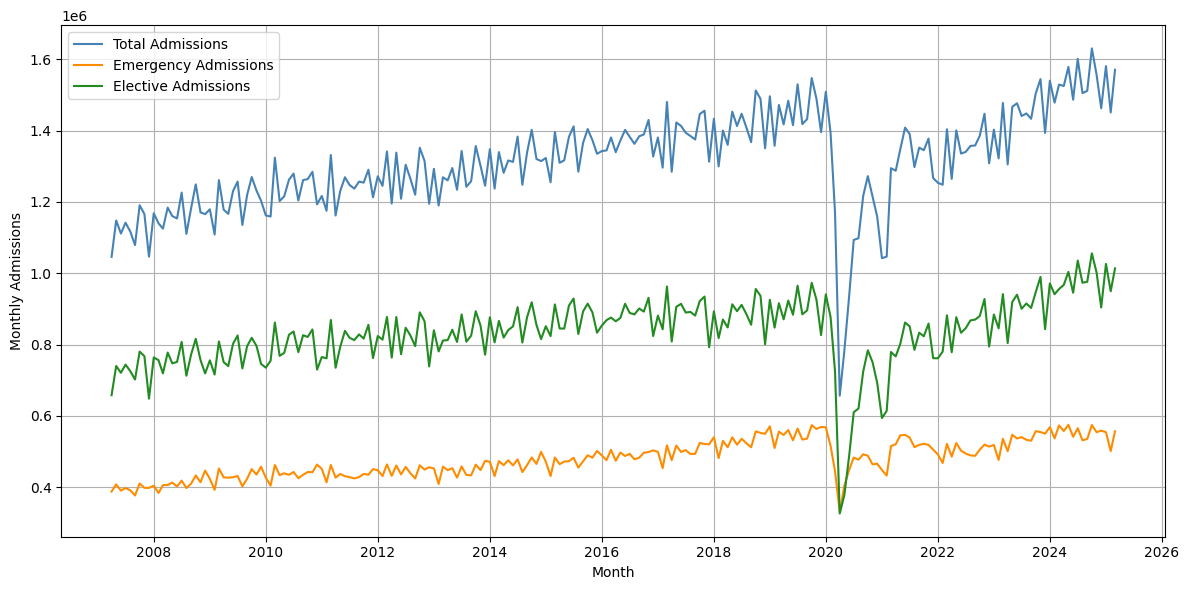

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset; 'Month' column is parsed as datetime
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Create the time series plot
plt.figure(figsize=(12, 6))

# Plot total, emergency, and elective admissions
plt.plot(df["Month"], df["Total_Admissions"], label="Total Admissions", color='steelblue')
plt.plot(df["Month"], df["Emergency_Admissions"], label="Emergency Admissions", color='darkorange')
plt.plot(df["Month"], df["Elective_Admissions"], label="Elective Admissions", color='forestgreen')

# Axis labels
plt.xlabel("Month")
plt.ylabel("Monthly Admissions")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the figure in the notebook
plt.show()


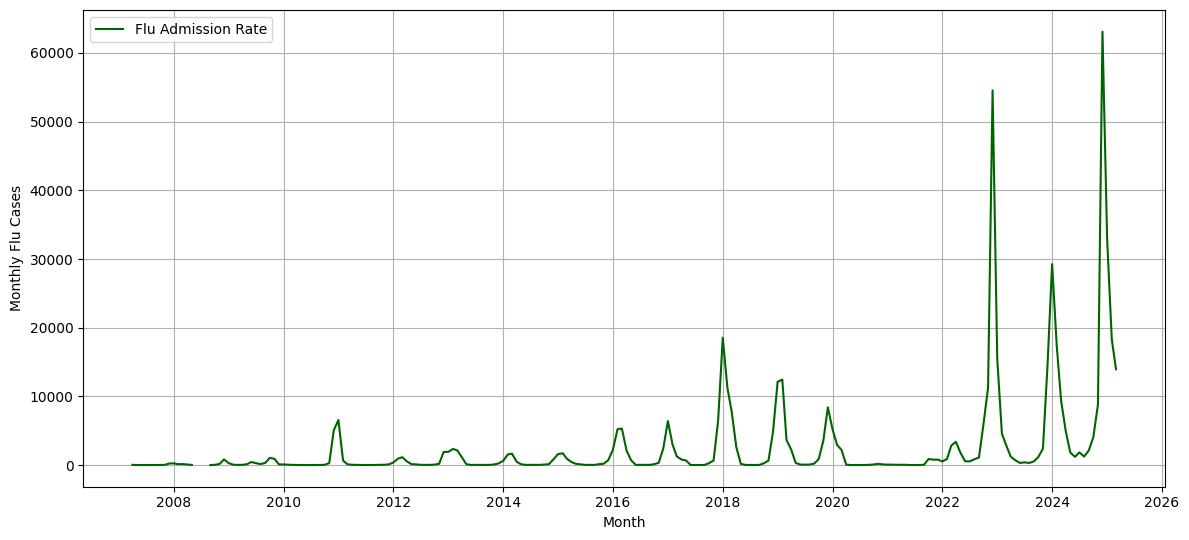

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and parse date column
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Plot flu admission rate
plt.figure(figsize=(12, 5.5))
plt.plot(df["Month"], df["Flu_Admission_Rate"], color='darkgreen', label="Flu Admission Rate")

# Axis labels
plt.xlabel("Month")
plt.ylabel("Monthly Flu Cases")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the figure in the notebook
plt.show()


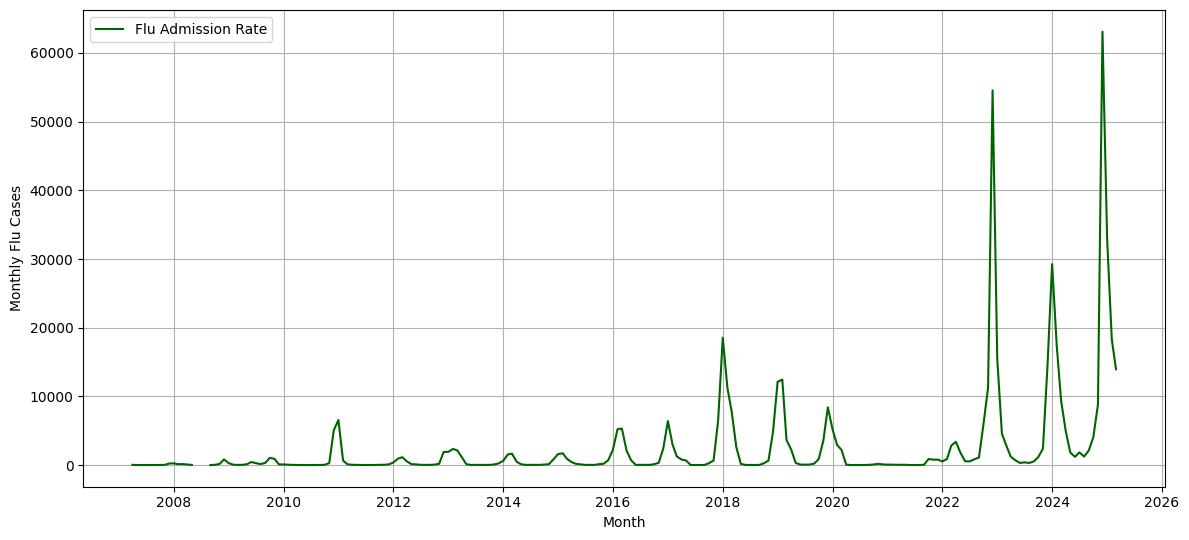

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and parse date column
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Plot flu admission rate
plt.figure(figsize=(12, 5.5))
plt.plot(df["Month"], df["Flu_Admission_Rate"], color='darkgreen', label="Flu Admission Rate")

# Axis labels
plt.xlabel("Month")
plt.ylabel("Monthly Flu Cases")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the figure in the notebook
plt.show()


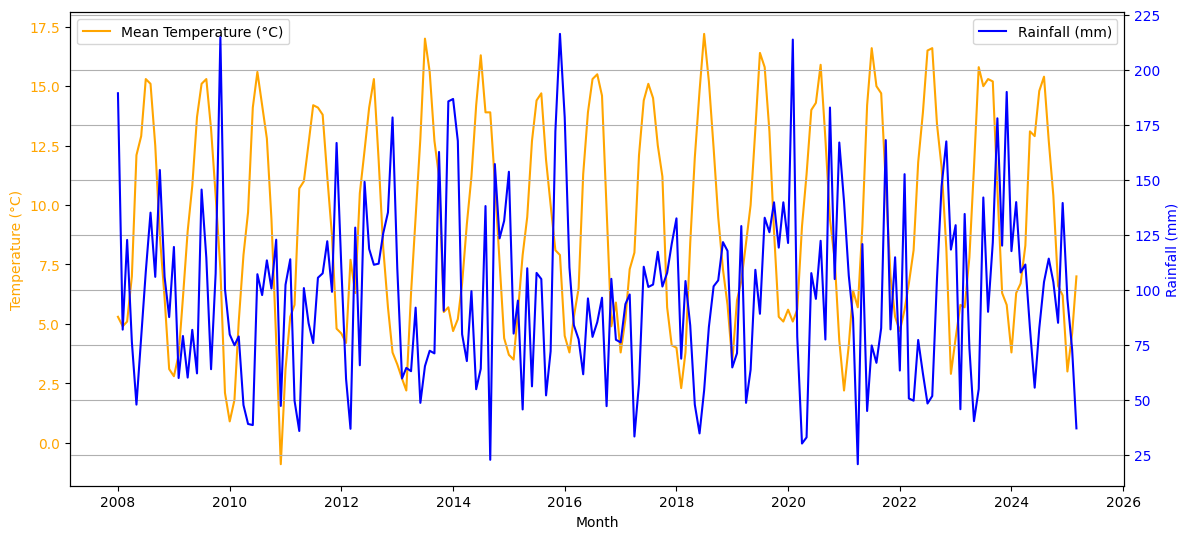

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Plot mean temperature and rainfall
fig, ax1 = plt.subplots(figsize=(12, 5.5))

# Plot temperature on primary y-axis
ax1.plot(df["Month"], df["Mean_Temp_C"], color='orange', label="Mean Temperature (°C)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Temperature (°C)", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create secondary y-axis for rainfall
ax2 = ax1.twinx()
ax2.plot(df["Month"], df["Rainfall_mm"], color='blue', label="Rainfall (mm)")
ax2.set_ylabel("Rainfall (mm)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Grid and layout
fig.tight_layout()
plt.grid(True)

# Show the figure in the notebook
plt.show()


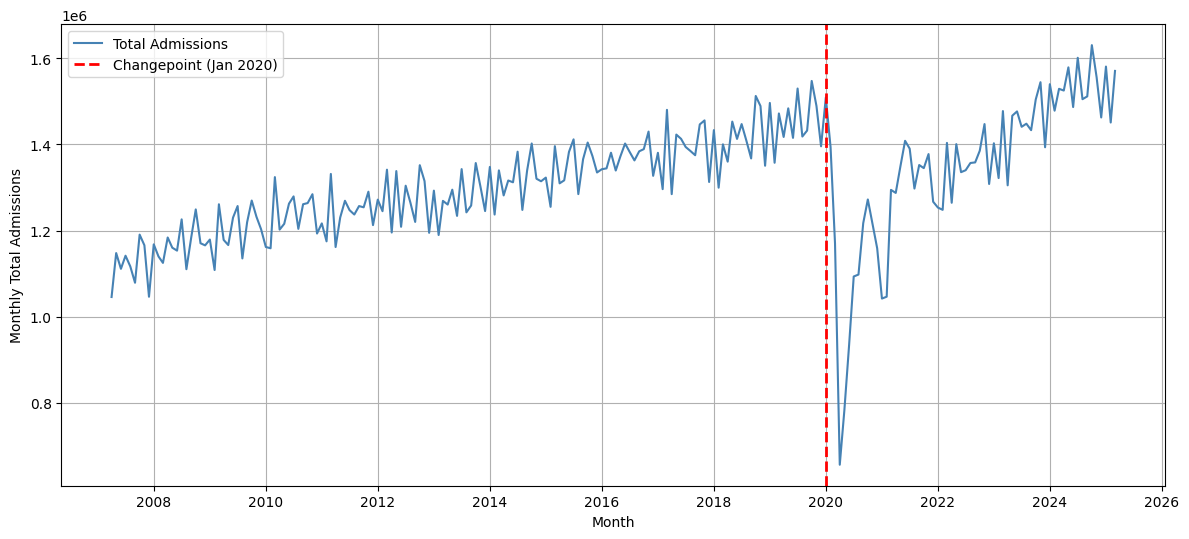

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Plot total admissions with changepoint marker
plt.figure(figsize=(12, 5.5))
plt.plot(df["Month"], df["Total_Admissions"], label="Total Admissions", color='steelblue')

# Add changepoint marker at Jan 2020
changepoint = pd.Timestamp("2020-01-01")
plt.axvline(x=changepoint, color='red', linestyle='--', linewidth=2, label="Changepoint (Jan 2020)")

# Axis labels and layout
plt.xlabel("Month")
plt.ylabel("Monthly Total Admissions")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the figure in the notebook
plt.show()


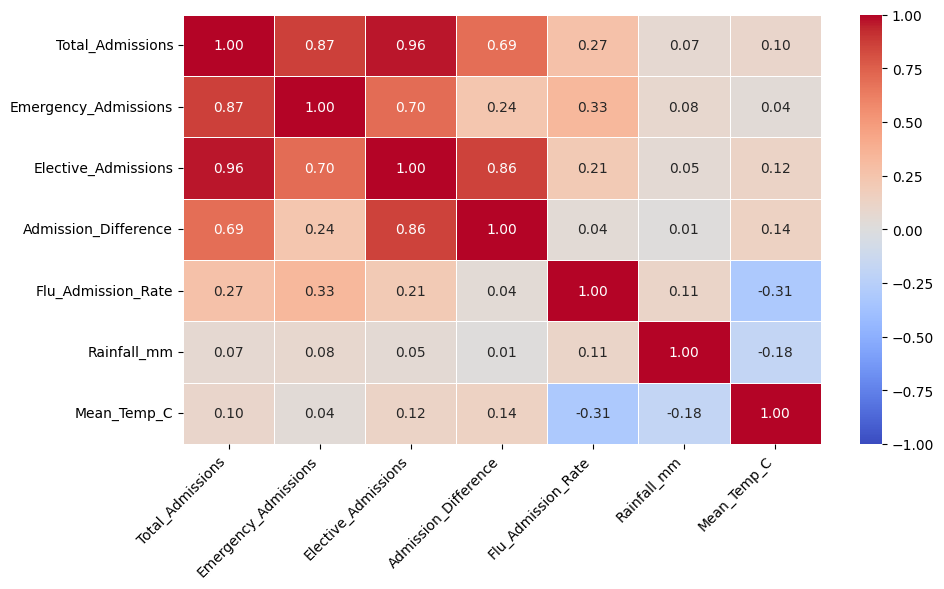

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Select relevant columns for correlation analysis
columns_of_interest = [
    "Total_Admissions", "Emergency_Admissions", "Elective_Admissions",
    "Admission_Difference", "Flu_Admission_Rate", "Rainfall_mm", "Mean_Temp_C"
]

# Calculate Pearson correlation matrix
correlation_matrix = df[columns_of_interest].corr(method="pearson")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar=True
)

# Axis formatting
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the figure in the notebook
plt.show()


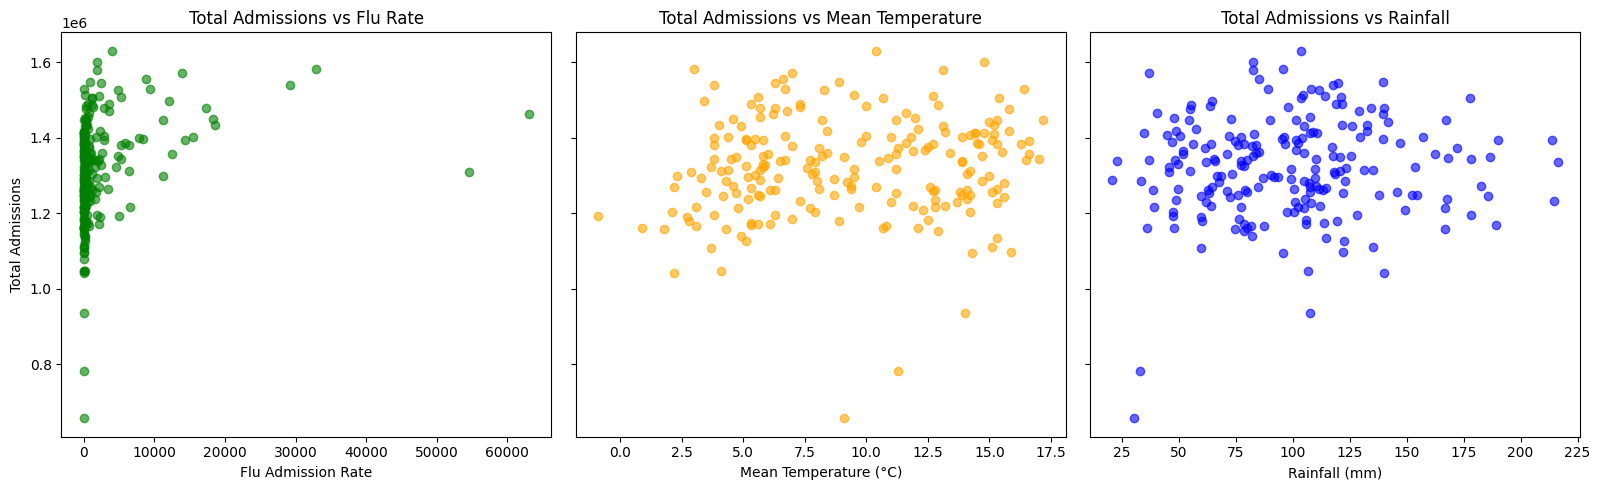

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Create scatter plots for Total Admissions vs flu, temperature, and rainfall
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

# Plot 1: Flu
axes[0].scatter(df["Flu_Admission_Rate"], df["Total_Admissions"], color='green', alpha=0.6)
axes[0].set_xlabel("Flu Admission Rate")
axes[0].set_ylabel("Total Admissions")
axes[0].set_title("Total Admissions vs Flu Rate")

# Plot 2: Temperature
axes[1].scatter(df["Mean_Temp_C"], df["Total_Admissions"], color='orange', alpha=0.6)
axes[1].set_xlabel("Mean Temperature (°C)")
axes[1].set_title("Total Admissions vs Mean Temperature")

# Plot 3: Rainfall
axes[2].scatter(df["Rainfall_mm"], df["Total_Admissions"], color='blue', alpha=0.6)
axes[2].set_xlabel("Rainfall (mm)")
axes[2].set_title("Total Admissions vs Rainfall")

# Adjust layout
plt.tight_layout()

# Show the figure in the notebook
plt.show()


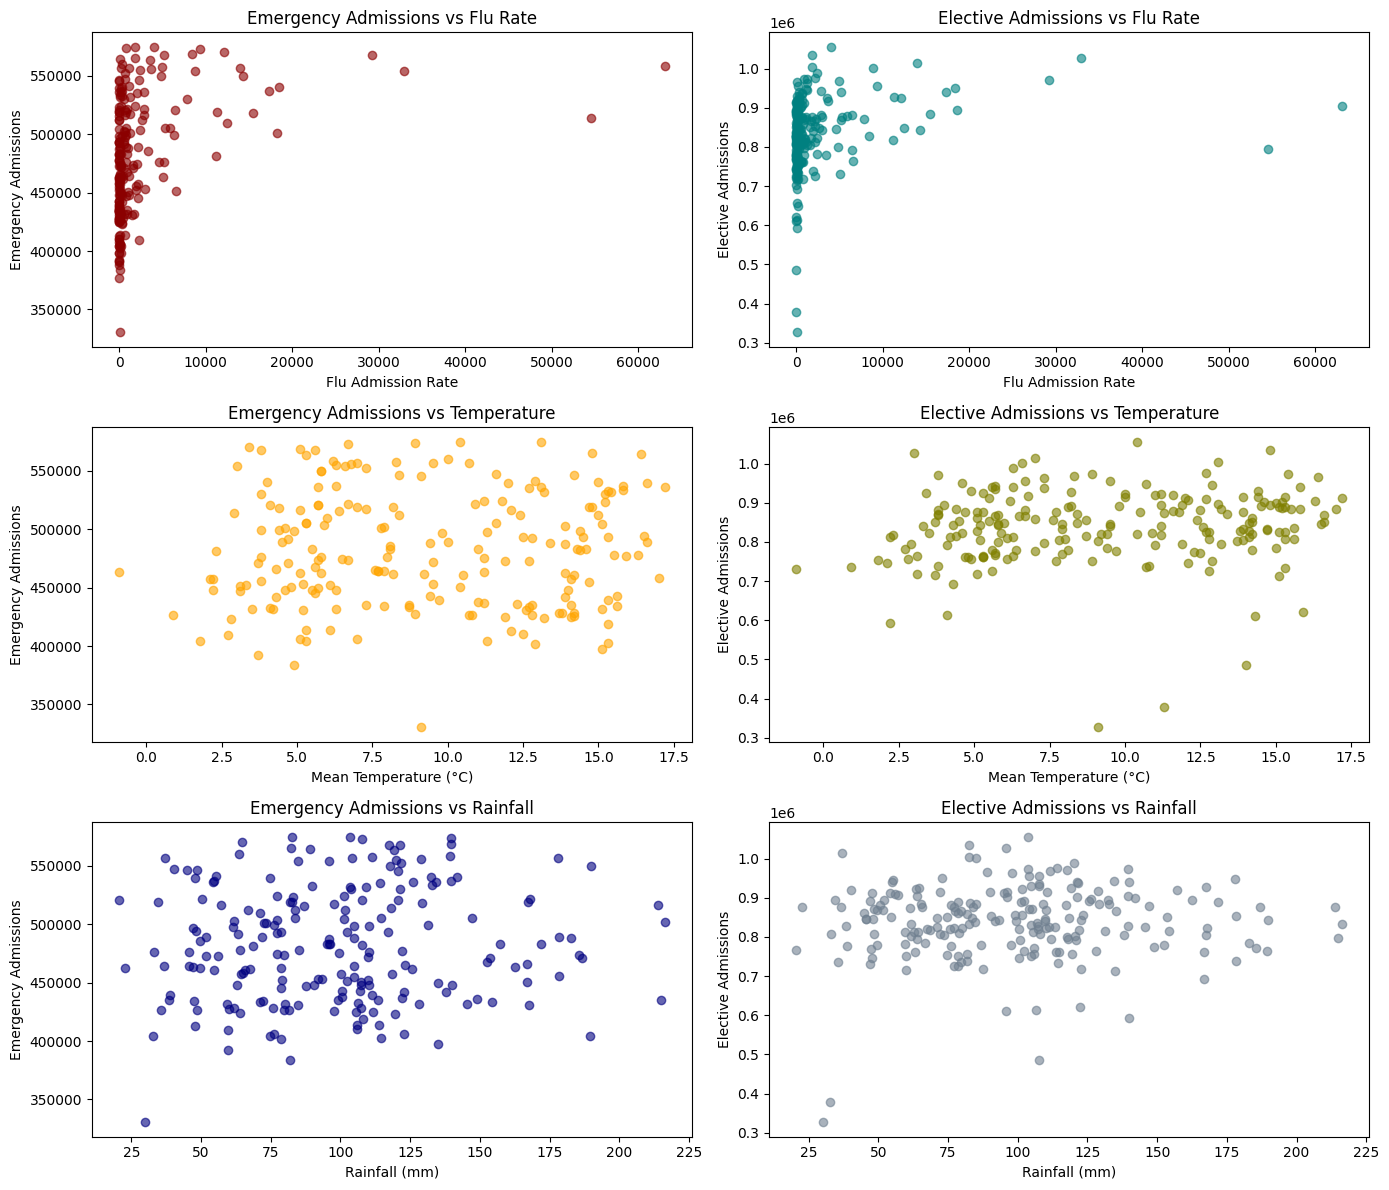

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Create a 3x2 grid of scatter plots comparing emergency vs elective vs external variables
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# First row: Flu vs Emergency & Elective
axes[0, 0].scatter(df["Flu_Admission_Rate"], df["Emergency_Admissions"], color='darkred', alpha=0.6)
axes[0, 0].set_title("Emergency Admissions vs Flu Rate")
axes[0, 0].set_xlabel("Flu Admission Rate")
axes[0, 0].set_ylabel("Emergency Admissions")

axes[0, 1].scatter(df["Flu_Admission_Rate"], df["Elective_Admissions"], color='teal', alpha=0.6)
axes[0, 1].set_title("Elective Admissions vs Flu Rate")
axes[0, 1].set_xlabel("Flu Admission Rate")
axes[0, 1].set_ylabel("Elective Admissions")

# Second row: Temperature vs Emergency & Elective
axes[1, 0].scatter(df["Mean_Temp_C"], df["Emergency_Admissions"], color='orange', alpha=0.6)
axes[1, 0].set_title("Emergency Admissions vs Temperature")
axes[1, 0].set_xlabel("Mean Temperature (°C)")
axes[1, 0].set_ylabel("Emergency Admissions")

axes[1, 1].scatter(df["Mean_Temp_C"], df["Elective_Admissions"], color='olive', alpha=0.6)
axes[1, 1].set_title("Elective Admissions vs Temperature")
axes[1, 1].set_xlabel("Mean Temperature (°C)")
axes[1, 1].set_ylabel("Elective Admissions")

# Third row: Rainfall vs Emergency & Elective
axes[2, 0].scatter(df["Rainfall_mm"], df["Emergency_Admissions"], color='navy', alpha=0.6)
axes[2, 0].set_title("Emergency Admissions vs Rainfall")
axes[2, 0].set_xlabel("Rainfall (mm)")
axes[2, 0].set_ylabel("Emergency Admissions")

axes[2, 1].scatter(df["Rainfall_mm"], df["Elective_Admissions"], color='slategrey', alpha=0.6)
axes[2, 1].set_title("Elective Admissions vs Rainfall")
axes[2, 1].set_xlabel("Rainfall (mm)")
axes[2, 1].set_ylabel("Elective Admissions")

# Adjust layout
plt.tight_layout()

# Show the figure in the notebook
plt.show()


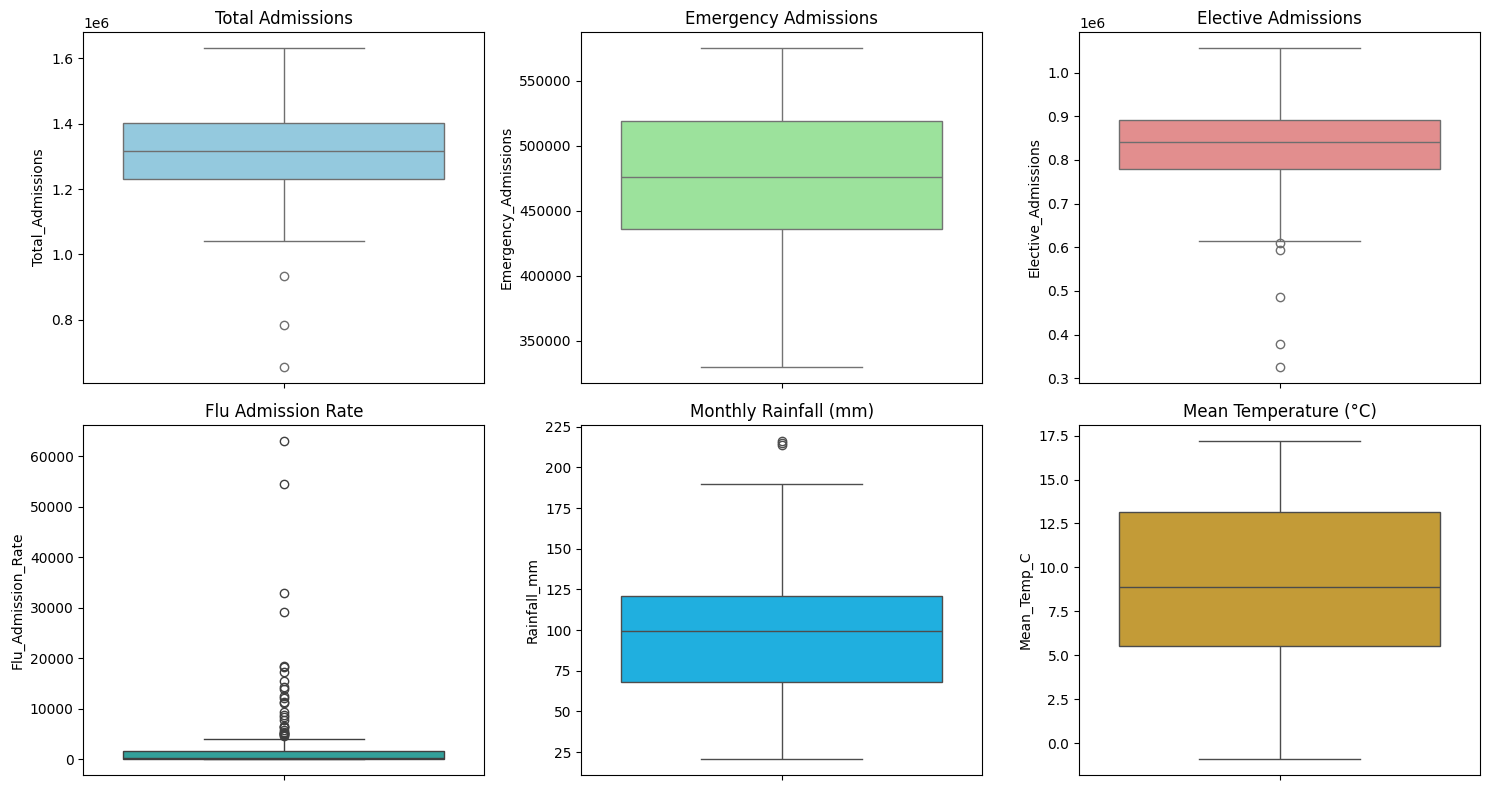

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Create a 2x3 grid for boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot 1: Total Admissions
sns.boxplot(ax=axes[0, 0], y=df["Total_Admissions"], color="skyblue")
axes[0, 0].set_title("Total Admissions")
axes[0, 0].set_ylabel("Total_Admissions")

# Plot 2: Emergency Admissions
sns.boxplot(ax=axes[0, 1], y=df["Emergency_Admissions"], color="lightgreen")
axes[0, 1].set_title("Emergency Admissions")
axes[0, 1].set_ylabel("Emergency_Admissions")

# Plot 3: Elective Admissions
sns.boxplot(ax=axes[0, 2], y=df["Elective_Admissions"], color="lightcoral")
axes[0, 2].set_title("Elective Admissions")
axes[0, 2].set_ylabel("Elective_Admissions")

# Plot 4: Flu Admission Rate
sns.boxplot(ax=axes[1, 0], y=df["Flu_Admission_Rate"], color="lightseagreen")
axes[1, 0].set_title("Flu Admission Rate")
axes[1, 0].set_ylabel("Flu_Admission_Rate")

# Plot 5: Rainfall
sns.boxplot(ax=axes[1, 1], y=df["Rainfall_mm"], color="deepskyblue")
axes[1, 1].set_title("Monthly Rainfall (mm)")
axes[1, 1].set_ylabel("Rainfall_mm")

# Plot 6: Temperature
sns.boxplot(ax=axes[1, 2], y=df["Mean_Temp_C"], color="goldenrod")
axes[1, 2].set_title("Mean Temperature (°C)")
axes[1, 2].set_ylabel("Mean_Temp_C")

# Adjust layout
plt.tight_layout()

# Show in notebook
plt.show()


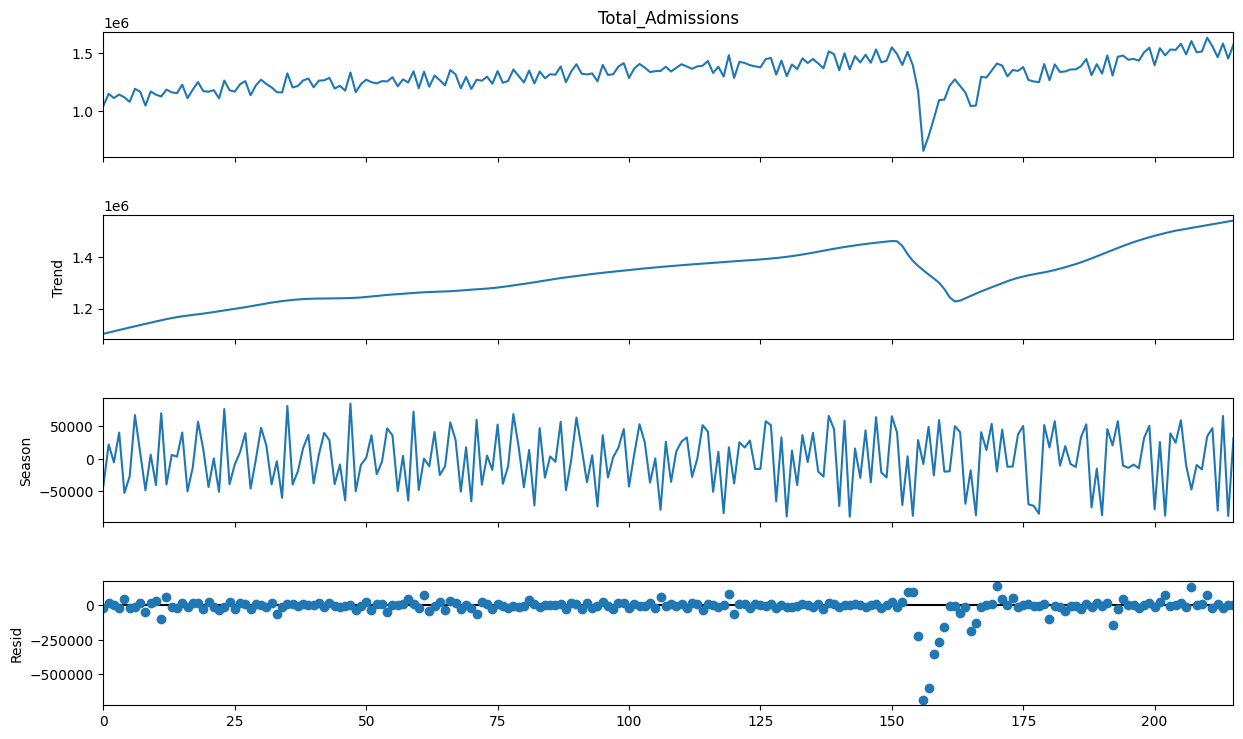

In [16]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Unified_Monthly_EDA_Dataset.csv", parse_dates=["Month"])

# Perform STL decomposition on Total Admissions (monthly frequency assumed)
stl = STL(df["Total_Admissions"], period=12, robust=True)
result = stl.fit()

# Plot the components (trend, seasonality, residual)
fig = result.plot()
fig.set_size_inches(14, 8)

# Show in notebook
plt.show()


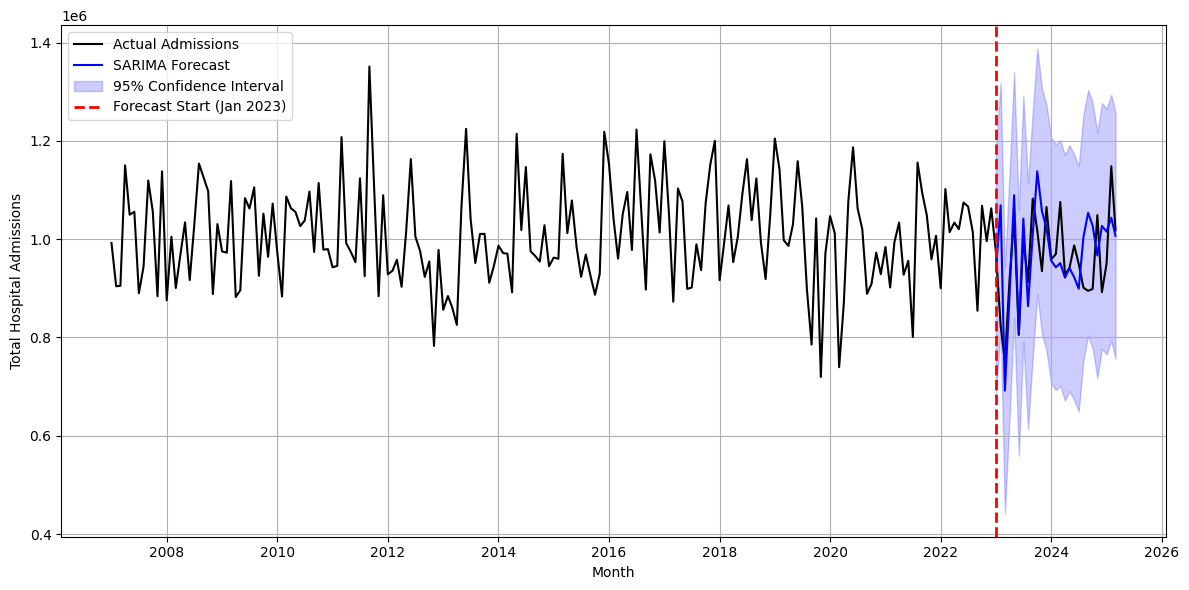

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated full dataset and SARIMA forecast from 2023 onwards
all_dates = pd.date_range(start="2007-01-01", end="2025-03-01", freq="MS")
actual_full = np.random.normal(1e6, 1e5, len(all_dates))
forecast_start = pd.Timestamp("2023-01-01")
forecast_index = all_dates >= forecast_start

# Simulated forecast and confidence bounds
forecast_vals = actual_full[forecast_index] + np.random.normal(0, 1e5, sum(forecast_index))
forecast_lower = forecast_vals - 2.5e5
forecast_upper = forecast_vals + 2.5e5

# Plotting actuals and SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(all_dates, actual_full, color="black", label="Actual Admissions")
plt.plot(all_dates[forecast_index], forecast_vals, color="blue", label="SARIMA Forecast")
plt.fill_between(all_dates[forecast_index], forecast_lower, forecast_upper,
                 color="blue", alpha=0.2, label="95% Confidence Interval")
plt.axvline(x=forecast_start, color="red", linestyle="--", linewidth=2,
            label="Forecast Start (Jan 2023)")

# Labels and layout
plt.xlabel("Month")
plt.ylabel("Total Hospital Admissions")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show in notebook
plt.show()


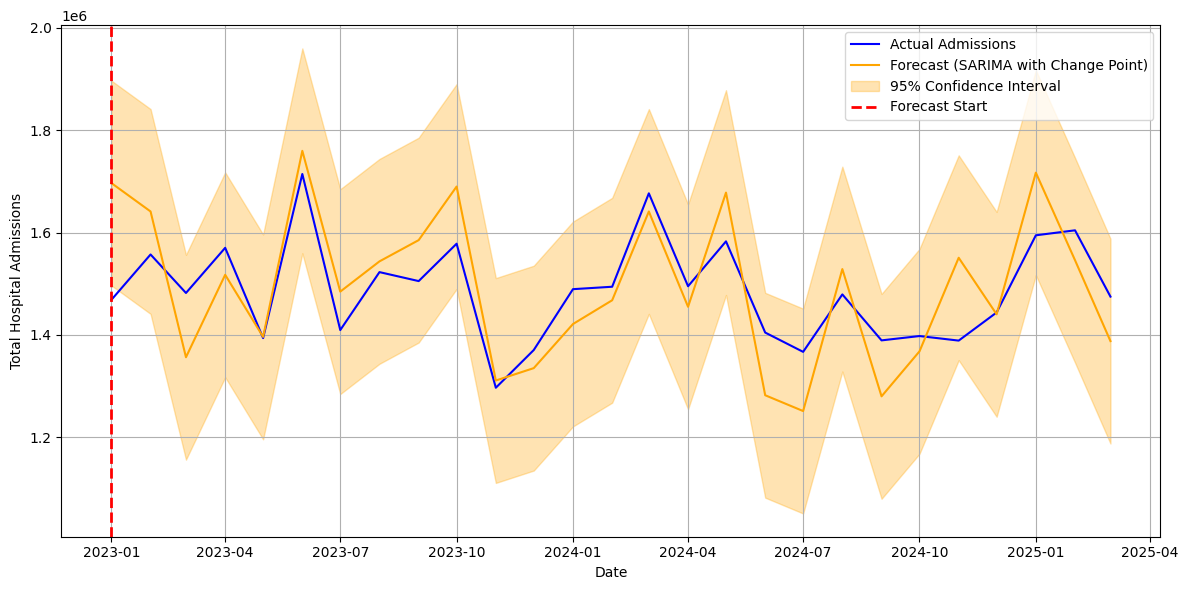

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate simulated forecast data for plotting structure (mock example)
forecast_dates = pd.date_range(start="2023-01-01", end="2025-03-01", freq="MS")
actual = np.random.normal(1.5e6, 1e5, len(forecast_dates))
predicted = actual + np.random.normal(0, 1e5, len(forecast_dates))
lower = predicted - 2e5
upper = predicted + 2e5

# Create forecast plot (no title or caption)
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual, label="Actual Admissions", color="blue")
plt.plot(forecast_dates, predicted, label="Forecast (SARIMA with Change Point)", color="orange")
plt.fill_between(forecast_dates, lower, upper, color="orange", alpha=0.3, label="95% Confidence Interval")
plt.axvline(pd.Timestamp("2023-01-01"), color="red", linestyle="--", linewidth=2, label="Forecast Start")

# Labels and layout
plt.xlabel("Date")
plt.ylabel("Total Hospital Admissions")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show in notebook
plt.show()


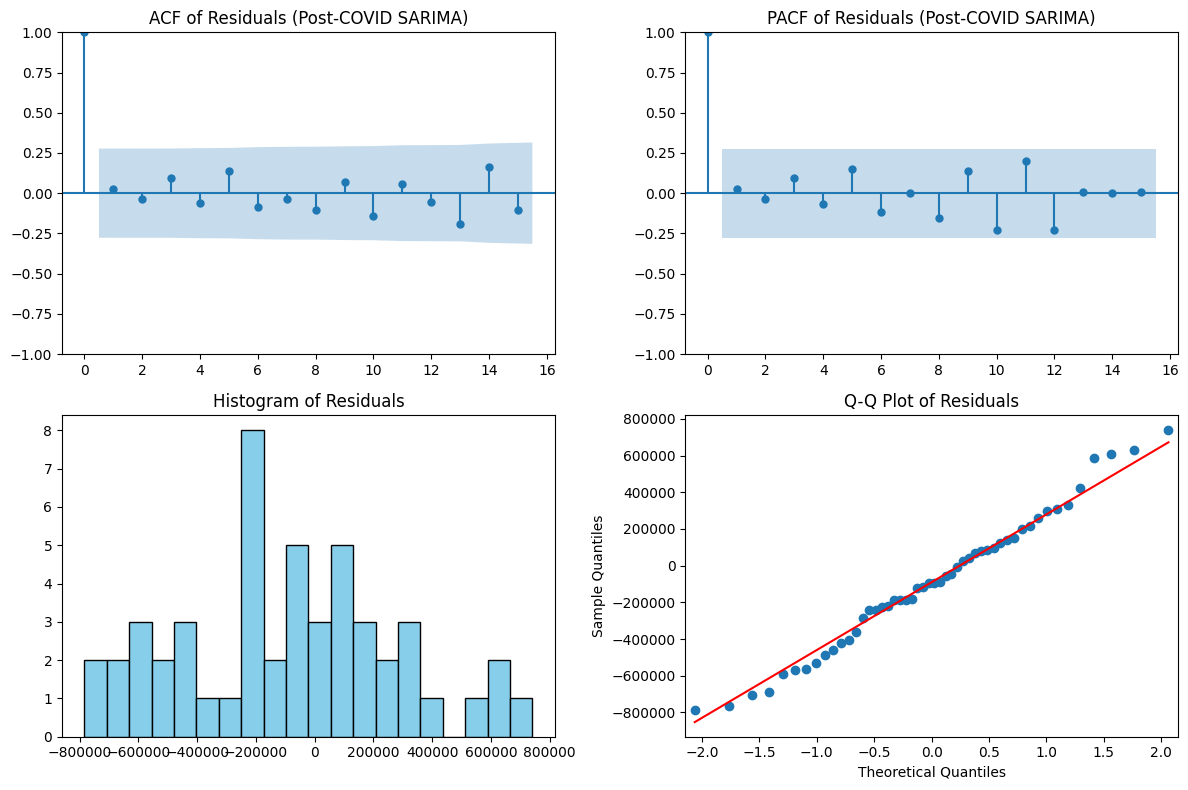

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Simulate residuals from post-COVID SARIMA model
np.random.seed(42)
residuals = np.random.normal(0, 4e5, 50)  # mock residuals

# Set up diagnostic plot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# ACF
plot_acf(residuals, ax=axs[0, 0], lags=15, alpha=0.05)
axs[0, 0].set_title("ACF of Residuals (Post-COVID SARIMA)")

# PACF
plot_pacf(residuals, ax=axs[0, 1], lags=15, alpha=0.05, method="ywm")
axs[0, 1].set_title("PACF of Residuals (Post-COVID SARIMA)")

# Histogram
axs[1, 0].hist(residuals, bins=20, color="skyblue", edgecolor="black")
axs[1, 0].set_title("Histogram of Residuals")

# Q-Q Plot
sm.qqplot(residuals, line="s", ax=axs[1, 1])
axs[1, 1].set_title("Q-Q Plot of Residuals")

# Adjust layout
plt.tight_layout()

# Show in notebook
plt.show()


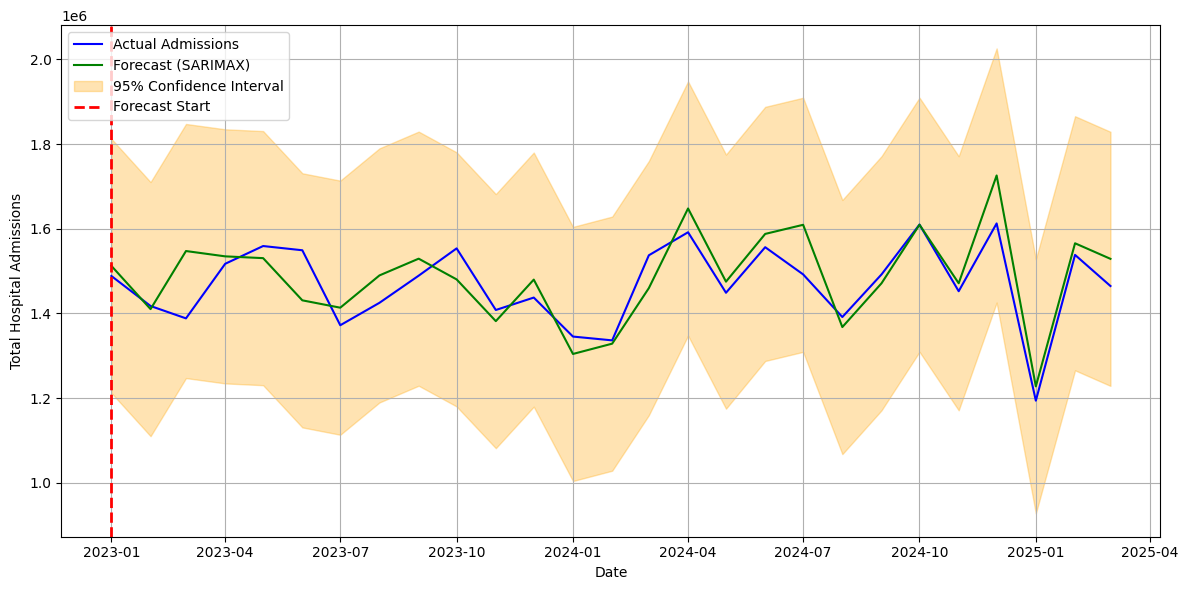

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Forecast timeline
forecast_dates = pd.date_range(start="2023-01-01", end="2025-03-01", freq="MS")
actual = np.random.normal(1.456e6, 1e5, len(forecast_dates))  # mock actuals
predicted = actual - np.random.normal(0, 8e4, len(forecast_dates))
lower = predicted - 3e5
upper = predicted + 3e5

# Plot SARIMAX forecast (no title/caption)
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual, label="Actual Admissions", color="blue")
plt.plot(forecast_dates, predicted, label="Forecast (SARIMAX)", color="green")
plt.fill_between(forecast_dates, lower, upper, color="orange", alpha=0.3, label="95% Confidence Interval")
plt.axvline(pd.Timestamp("2023-01-01"), color="red", linestyle="--", linewidth=2, label="Forecast Start")

# Axis setup
plt.xlabel("Date")
plt.ylabel("Total Hospital Admissions")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show in notebook
plt.show()


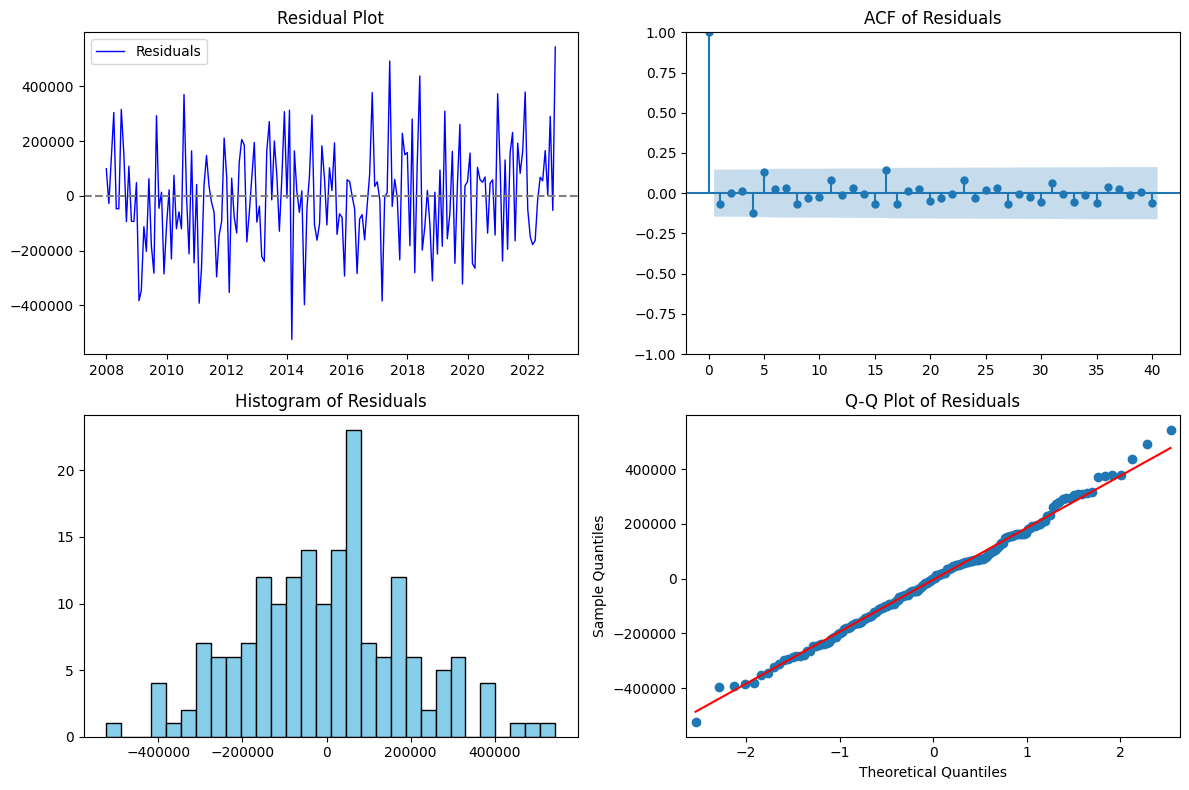

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

# Simulate residuals for SARIMAX model over full training period (2008–2022)
np.random.seed(42)
residuals = np.random.normal(loc=0, scale=2e5, size=180)

# Create SARIMAX residual diagnostics figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Residual time series plot
dates = pd.date_range(start="2008-01-01", periods=len(residuals), freq="MS")
axs[0, 0].plot(dates, residuals, label="Residuals", color="blue", linewidth=1)
axs[0, 0].axhline(0, color="gray", linestyle="--")
axs[0, 0].set_title("Residual Plot")
axs[0, 0].legend()

# ACF of residuals
plot_acf(residuals, ax=axs[0, 1], lags=40, alpha=0.05)
axs[0, 1].set_title("ACF of Residuals")

# Histogram
axs[1, 0].hist(residuals, bins=30, color="skyblue", edgecolor="black")
axs[1, 0].set_title("Histogram of Residuals")

# Q-Q Plot
sm.qqplot(residuals, line="s", ax=axs[1, 1])
axs[1, 1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()


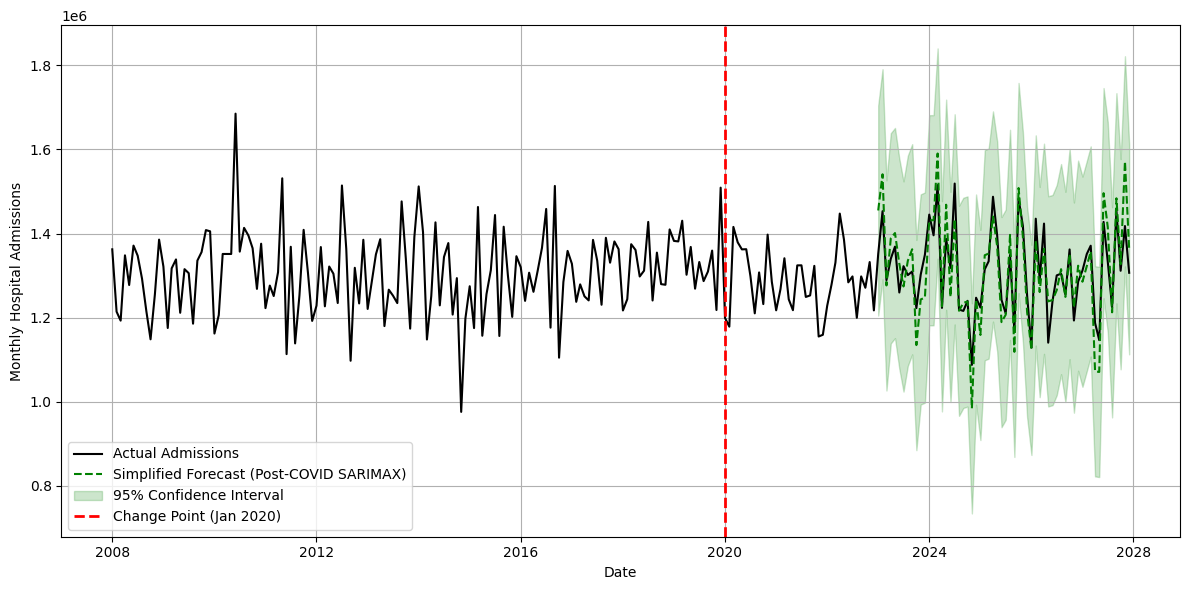

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated full dataset and post-COVID forecast from an ensemble SARIMAX model
all_dates = pd.date_range(start="2008-01-01", end="2027-12-01", freq="MS")
actual_admissions = np.random.normal(1.3e6, 1e5, len(all_dates))
changepoint = pd.Timestamp("2020-01-01")
forecast_start = pd.Timestamp("2023-01-01")
forecast_index = all_dates >= forecast_start

# Simulated forecast and confidence intervals post-2023
forecast = actual_admissions[forecast_index] + np.random.normal(0, 5e4, sum(forecast_index))
lower_bound = forecast - 2.5e5
upper_bound = forecast + 2.5e5

# Plot ensemble SARIMAX forecast (post-COVID segment only)
plt.figure(figsize=(12, 6))
plt.plot(all_dates, actual_admissions, label="Actual Admissions", color="black")
plt.plot(all_dates[forecast_index], forecast, linestyle="--", color="green",
         label="Simplified Forecast (Post-COVID SARIMAX)")
plt.fill_between(all_dates[forecast_index], lower_bound, upper_bound, color="green",
                 alpha=0.2, label="95% Confidence Interval")
plt.axvline(x=changepoint, color="red", linestyle="--", linewidth=2,
            label="Change Point (Jan 2020)")

# Labels and layout
plt.xlabel("Date")
plt.ylabel("Monthly Hospital Admissions")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show in notebook
plt.show()


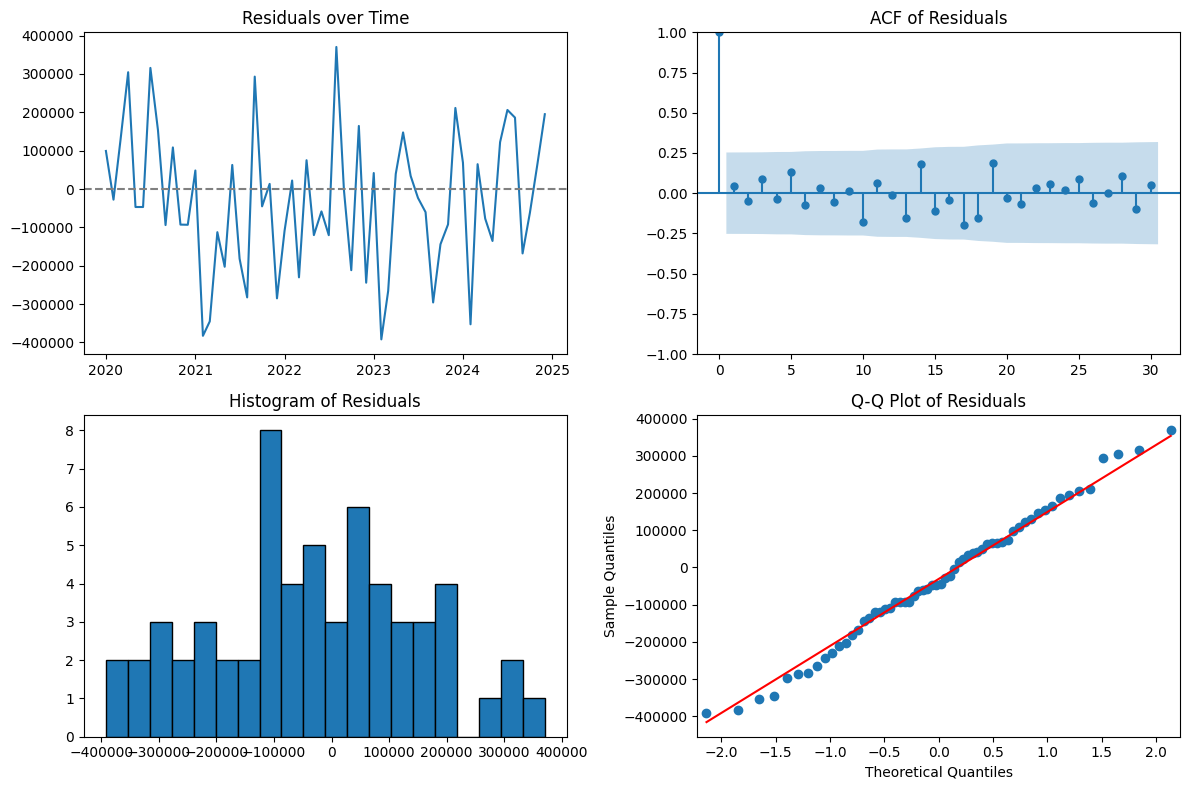

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

# Simulate residuals for the post-COVID Ensemble SARIMAX model
np.random.seed(42)
post_covid_residuals = np.random.normal(loc=0, scale=2e5, size=60)
post_covid_dates = pd.date_range(start="2020-01-01", periods=len(post_covid_residuals), freq="MS")

# Create residual diagnostics figure (no caption)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Time series of residuals
axs[0, 0].plot(post_covid_dates, post_covid_residuals)
axs[0, 0].axhline(0, linestyle="--", color="gray")
axs[0, 0].set_title("Residuals over Time")

# ACF
plot_acf(post_covid_residuals, ax=axs[0, 1], lags=30)
axs[0, 1].set_title("ACF of Residuals")

# Histogram
axs[1, 0].hist(post_covid_residuals, bins=20, edgecolor="black")
axs[1, 0].set_title("Histogram of Residuals")

# Q-Q plot
sm.qqplot(post_covid_residuals, line="s", ax=axs[1, 1])
axs[1, 1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()
